In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [29]:
random.randint(0, 10000)

5481

In [3]:
number="10"

<Axes: >

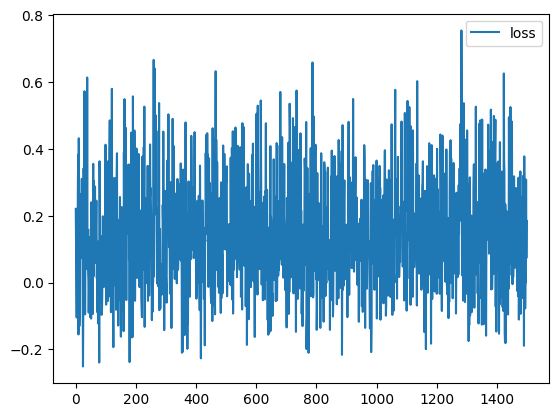

In [4]:
filename = "loss"+number+".csv"
loss = pd.read_csv(filename)
loss.iloc[:,1:].plot()

<Axes: >

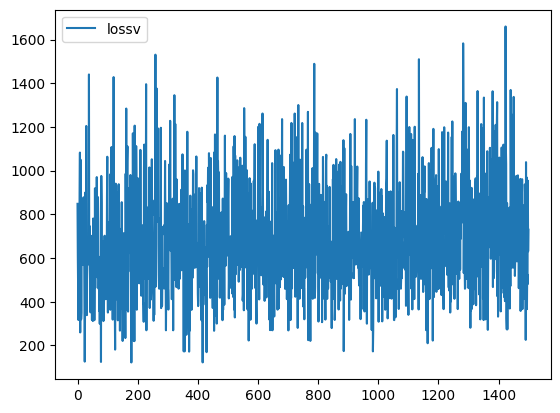

In [5]:
filename = "lossv"+number+".csv"
lossv = pd.read_csv(filename)
lossv.iloc[:,1:].plot()

<Axes: >

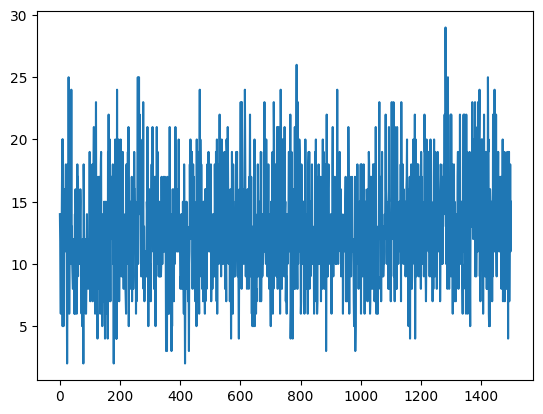

In [6]:
filename = "reward"+number+".csv"
reward = pd.read_csv(filename)
reward['mean reward']=reward[reward.columns[2:].tolist()].mean(axis=1)
reward.iloc[:,-1].plot()

<Axes: >

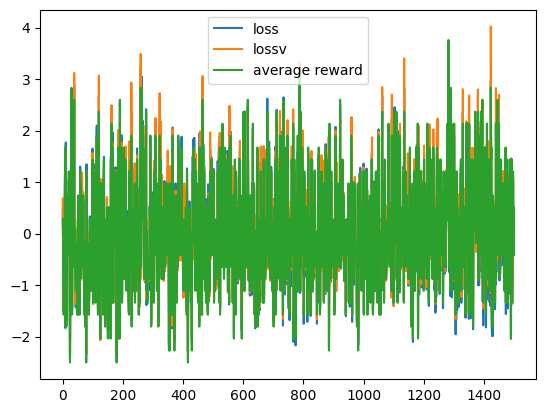

In [7]:
# combine plot
results = pd.DataFrame()
results['loss'] = (loss['loss']-loss['loss'].mean())/loss['loss'].std()
results['lossv'] = (lossv['lossv']-lossv['lossv'].mean())/lossv['lossv'].std()
results['average reward'] = (reward['mean reward']-reward['mean reward'].mean())/reward['mean reward'].std()
results.plot()

<Axes: >

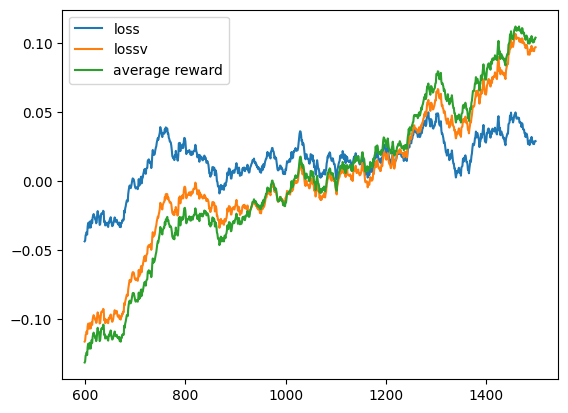

In [8]:
results.rolling(window=600).mean().plot()

In [2]:
def combine_table(filenames):
    results = pd.DataFrame()
    for i in range(len(filenames)):
        loss = pd.read_csv("loss" + filenames[i] + ".csv")
        lossv = pd.read_csv("lossv" + filenames[i] + ".csv")
        reward = pd.read_csv("reward" + filenames[i] + ".csv")
        reward['mean reward']=reward[reward.columns[2:].tolist()].mean(axis=1)
        results["loss" + filenames[i]] = loss['loss']
        results["lossv" + filenames[i]] = lossv['lossv']
        results["reward" + filenames[i]] = reward['mean reward']
    return results

In [3]:
def standardize_table(df):
    columns = df.columns
    results_std = pd.DataFrame()
    for i in range(len(columns)):
        results_std[columns[i]] = (df[columns[i]] - df[columns[i]].mean()) / df[columns[i]].std()
    return results_std

In [4]:
def get_mean(df, groups):
    key_words = ['init', 'growth', 'end']
    metrics = ['loss', 'lossv', 'reward']
    for i in range(len(groups)):
        for k in range(len(metrics)):
            df['mean ' + key_words[i] + ' ' + metrics[k]] = df[metrics[k] + groups[i][0]]
            for j in range(1, len(groups[i])):
                df['mean ' + key_words[i] + ' ' + metrics[k]] += df[metrics[k] + groups[i][j]]
            df['mean ' + key_words[i] + ' ' + metrics[k]] /= len(groups[i])
    return df


In [28]:
df = pd.DataFrame()
df['t1'] = [1, 3, 4, 3]
df['t2'] = [ i for i in range(4)]
df['t3'] = df['t1']
df['t3'] += df['t2']
df['t3'] /= 2
df

,t1,t2,t3
0,1,0,0.5
1,3,1,2.0
2,4,2,3.0
3,3,3,3.0


In [14]:
filenames = ['10', '11', '12', '4605i', '4605g', '4605e', '14', '15', '16', '17', '18', '19', '491i', '491g', '491e']
results = combine_table(filenames)
results_std = standardize_table(results)

In [15]:
get_mean(results, [['12', '16', '19', '4605i', '491i'], ['10', '14', '17', '4605g', '491g'], ['11', '15', '18', '4605e', '491e']])

,loss10,lossv10,reward10,loss11,lossv11,reward11,loss12,lossv12,reward12,loss4605i,...,reward491e,mean init loss,mean init lossv,mean init reward,mean growth loss,mean growth lossv,mean growth reward,mean end loss,mean end lossv,mean end reward
0,0.220525,848.115906,14.0,0.447305,645.584229,12.0,0.220525,848.115906,14.0,-0.171851,...,16.0,0.339210,592.864172,10.4,0.387728,697.855200,12.4,0.468001,604.247675,11.2
1,0.113143,610.323547,12.0,0.215624,314.130310,6.0,0.113143,610.323547,12.0,0.014884,...,17.0,0.430641,713.996228,13.2,0.436840,758.170740,13.8,0.482430,640.042444,11.4
2,0.006780,485.071381,9.0,0.345172,504.960144,10.0,0.006780,485.071381,9.0,0.003982,...,8.0,0.391583,685.661792,11.8,0.435288,815.844482,13.4,0.499917,676.895868,12.0
3,-0.104628,316.118073,6.0,1.001650,1475.140625,27.0,-0.104628,316.118073,6.0,0.087817,...,12.0,0.380016,661.531476,11.8,0.389764,703.595886,12.6,0.624281,839.188782,15.6
4,0.147062,675.713989,13.0,0.213250,340.180664,6.0,0.147062,675.713989,13.0,-0.027845,...,9.0,0.333385,574.960718,10.2,0.321505,584.746118,10.6,0.361861,474.470471,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.029080,525.311401,11.0,0.179982,1173.893677,19.0,0.130259,661.202576,14.0,0.164645,...,12.0,0.094884,605.346655,11.4,0.074599,567.281830,11.2,0.153117,940.912146,16.6
1496,0.000176,479.918121,11.0,0.550275,1614.757446,32.0,0.206552,755.628784,15.0,-0.081436,...,19.0,0.199480,769.365857,14.0,0.075137,577.074530,11.0,0.189505,956.009912,18.2
1497,0.308058,954.141785,18.0,0.244120,1131.311890,23.0,0.156254,717.549438,14.0,0.242295,...,12.0,0.259973,844.759875,16.0,0.224012,805.250525,15.2,0.158107,907.295935,17.2
1498,0.073147,630.728943,11.0,0.472201,1476.858276,30.0,0.348529,1033.572998,19.0,0.362834,...,15.0,0.354455,979.797363,18.2,0.207280,766.239838,14.4,0.198563,985.670972,18.4


<Axes: >

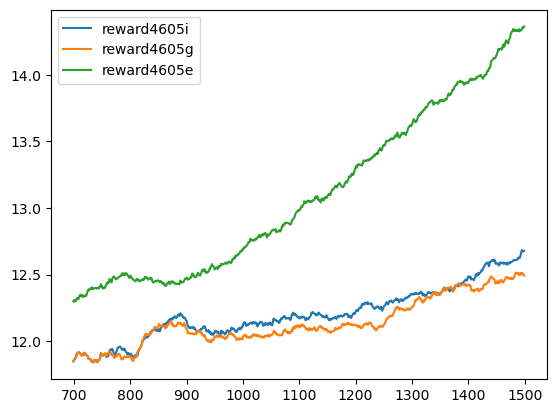

In [13]:
results[['reward4605i', 'reward4605g', 'reward4605e']].rolling(700).mean().plot()

<Axes: >

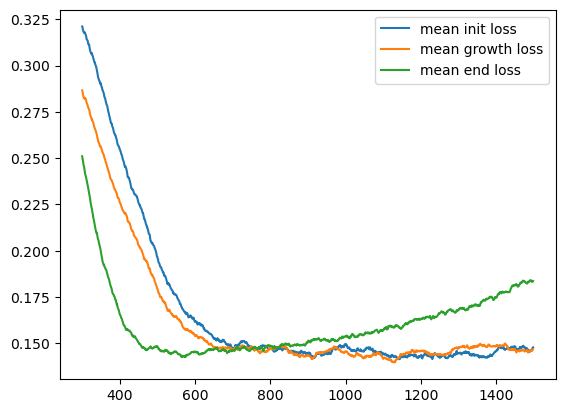

In [23]:
results[['mean init loss', 'mean growth loss', 'mean end loss']].rolling(300).mean().plot()

<Axes: >

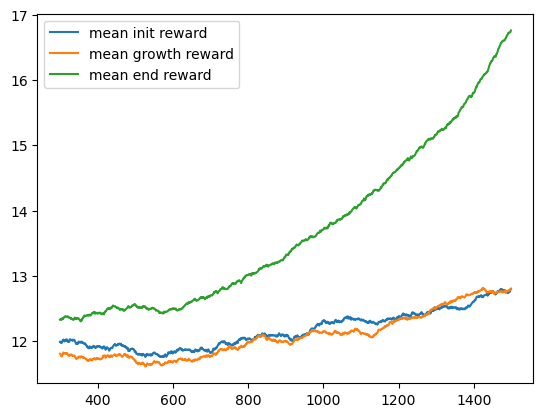

In [24]:
results[['mean init reward', 'mean growth reward', 'mean end reward']].rolling(300).mean().plot()

In [1]:
from statsmodels.tsa.stattools import adfuller

test_data = [1,3,7,3,8,3,6,8]
result = adfuller(test_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
a = [15, 12, 58, 89, 7, 75, 7, 66, 50, 31, 32]
b = [i for i in range(len(a))]
from scipy.stats import linregress
c = linregress(a, b)
c.slope

0.010759507276909514